# Mandatory Assignment 3 DAT200 NMBU 2025

In [70]:
# Import necessary libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

## 1. Load the dataset and explore it

In [71]:
train_df = pd.read_csv('assets/train.csv')
test_df = pd.read_csv('assets/test.csv')
train_df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Peel Thickness,Banana Density,Quality
0,-1.825734,-0.883754,-2.423530,-1.198136,-4.286523,1.585792,-0.589002,0.164434,65822.758426,0
1,-0.142286,-0.708374,-2.224219,2.222650,1.896814,-4.284821,1.069387,0.704945,99930.329162,0
2,-1.957254,-4.293733,-1.073703,-1.405019,-0.729812,3.930497,-0.397840,0.852810,37081.567982,0
3,-2.168043,3.095472,1.707717,-0.584218,-0.564767,0.014740,-0.103799,0.582909,63931.435551,1
4,-3.149338,3.058402,2.173671,-0.265609,-2.563220,0.376015,1.434252,0.102162,48711.448819,1


In [72]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Size            2800 non-null   float64
 1   Weight          2800 non-null   float64
 2   Sweetness       2800 non-null   float64
 3   Softness        2800 non-null   float64
 4   HarvestTime     2800 non-null   float64
 5   Ripeness        2800 non-null   float64
 6   Acidity         2800 non-null   float64
 7   Peel Thickness  2800 non-null   float64
 8   Banana Density  2800 non-null   float64
 9   Quality         2800 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 218.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Size            1200 non-null   float64
 1   Weight          1200 non-null   float64
 2   Sweetness 

(None, None)

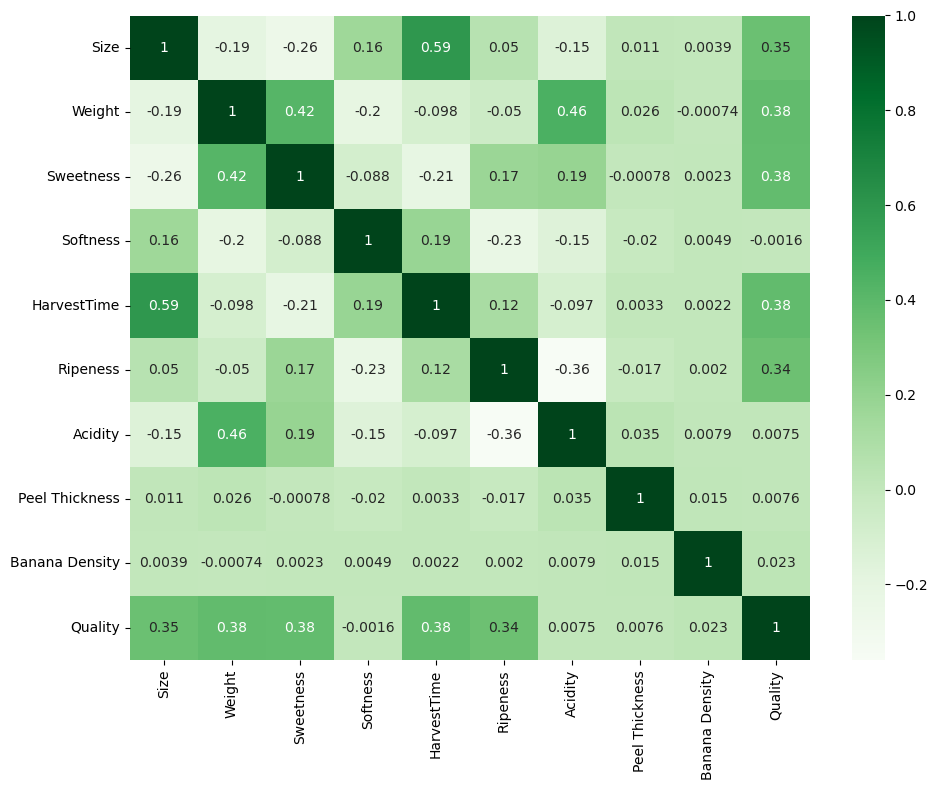

In [73]:
# make a confusion matrix
matrix = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, cmap="Greens", annot=True)
plt.tight_layout()
plt.show()

Looking it at the correlation matrix, it seems some columns are contributing more then others. Therefore we'll try to add features and possible drop some. But first we'll get a benchmark for accuracy

In [114]:
def add_features(df):
    df = df.copy()
    df = df.drop(['Peel Thickness', 'Banana Density'], axis=1)
    df['feature1'] = (df['Ripeness'] * df['Softness']) / df['HarvestTime']
    df['feature2'] = df['Ripeness'] - df['HarvestTime']
    df['feature3'] = df['Ripeness'] / df['Softness']
    df['feature4'] = df['Softness'] ** 2
    df['feature5'] = df['HarvestTime'] / df['Ripeness']
    return df

pipeline = Pipeline([
    ('feature_engineering', FunctionTransformer(add_features)),
    ('scaler', StandardScaler())
])

In [115]:
X = train_df.drop('Quality', axis=1)
y = train_df['Quality']

# Split into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on training data and transform both train and test.
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [116]:
clf = svm.SVC(C=10, kernel="rbf", probability=True)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy}, F1: {f1}')

Accuracy: 0.975, F1: 0.9749984051036681


In [117]:
scaled_test_df = pipeline.transform(test_df)

y_test = clf.predict(scaled_test_df)
y_test = pd.DataFrame(y_test, columns=["Quality"])
y_test.index.name = "ID"
y_test[['Quality']].to_csv("submission.csv")
